# Class 1

Topics:
- conversion between linear color spaces rgb and yiq
- change of luminance and color intensity
- clip in yiq and rgb

start with import of packages / libraries / functions, we import only few libraries (so far no scipy, opencv, etc) 
- imageio to open and save images
- numpy to make the computations in vector / matrix format
- matplotlib.pyplot to show images

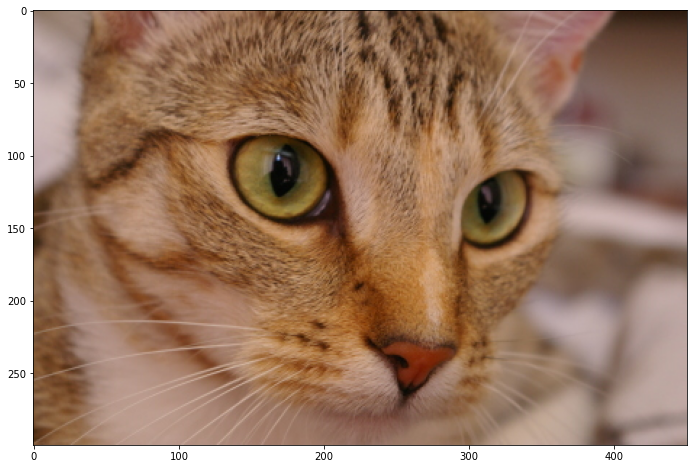

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

im = imageio.imread('imageio:chelsea.png')/255.
plt.figure(figsize=(20,8))
plt.imshow(im)
plt.show()

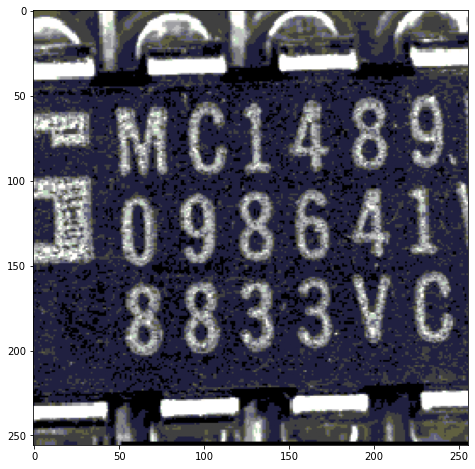

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

im = imageio.imread('chip.bmp')/255.
plt.figure(figsize=(20,8))
plt.imshow(im)
plt.show()

- conversion from rgb to yiq

In [4]:
MAT_YIQ = np.array([[0.299, 0.595716, 0.211456],
                    [0.587, -0.274453, -0.522591],
                    [0.114, -0.321263, 0.311135]])

In [5]:
def rgb2yiq(_im):
    _rgb = _im.reshape((-1,3))
    _yiq = _rgb @ MAT_YIQ
    _yiq = _yiq.reshape(_im.shape)
    return _yiq

In [11]:
def RGB_to_YIQ(rgb):
   yiq = np.zeros(rgb.shape)
   yiq[:,:,0] = 0.229*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
   yiq[:,:,1] = 0.595716*rgb[:,:,0] - 0.274453*rgb[:,:,1] - 0.321263*rgb[:,:,2]
   yiq[:,:,2] = 0.211456*rgb[:,:,0] - 0.522591*rgb[:,:,1] + 0.311135*rgb[:,:,2]
   yiq[:,:,3]=rgb[:,:,3]
   return yiq

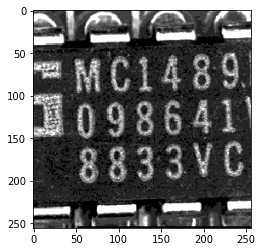

In [15]:
yiq=RGB_to_YIQ(im)
plt.imshow(yiq[:,:,0],'gray')

- conversion from yiq to rgb

In [4]:
def yiq2rgb(_im):
    return (_im.reshape((-1, 3)) @ np.linalg.inv(MAT_YIQ)).reshape(_im.shape)

- test: identical transform 

RMSE = 7.674692007347684e-17


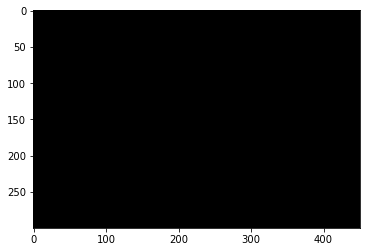

In [5]:
def rmse(im_1, im_2 = 0):
    return ((im_1 - im_2)**2).mean()**0.5

_yiq = rgb2yiq(im)
_rec = yiq2rgb(_yiq)

print('RMSE = ' + str(rmse(im, _rec)))
plt.imshow(np.abs(im - _rec))
plt.show()

- change intensity

In [6]:
def change_intensity(_im, alpha=1, beta=1):
    """Change linearly luminance and intensity in yiq."""
    _yiq = rgb2yiq(_im) * np.array([alpha, beta, beta])[np.newaxis, np.newaxis, :]
    _rgb = yiq2rgb(_yiq)
    return _rgb

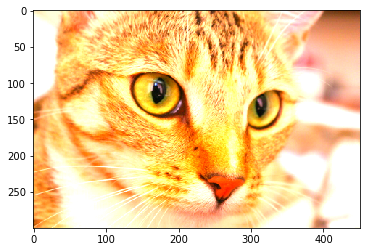

In [7]:
im_2 = change_intensity(im, 2, 3)
im_2 = np.clip(im_2, 0, 1)
plt.imshow(im_2)
plt.show()

- py-files = python library
- write everything in a py-file

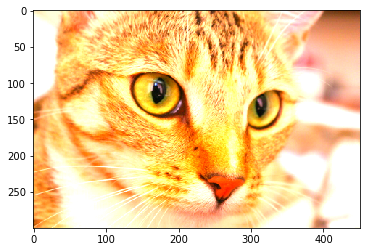

In [8]:
import my_functions as mf

im = imageio.imread('imageio:chelsea.png')/255.
im_2 = np.clip(mf.change_intensity(im, 2, 3),0 , 1)
plt.imshow(im_2)
plt.show()

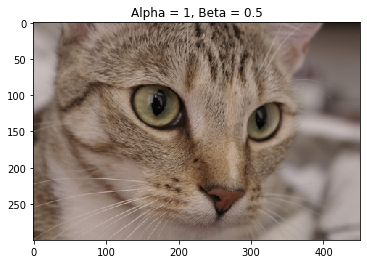

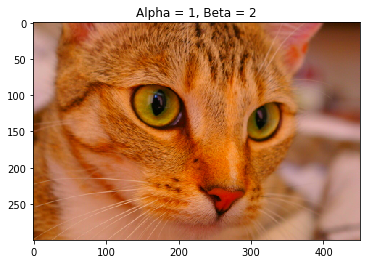

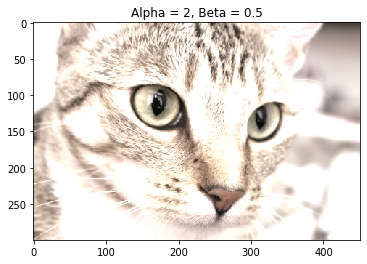

In [10]:
values = [(1,0.5),(1,2),(2,0.5)]
for val in values:
    plt.imshow(np.clip(mf.change_intensity(im, val[0], val[1]),0,1))
    plt.title('Alpha = ' +str(val[0])+', Beta = '+str(val[1]))
    plt.show()

- what about clipping in yiq-space???

In [11]:
def _clip(_data, matrix = np.eye(3)):
    corners = np.array(np.meshgrid([0., 1.], [0., 1.], [0., 1.])).swapaxes(0,3).reshape((8, 3))
    _mapped = corners @ matrix
    _data[..., :] = np.clip(_data[..., :], np.min(_mapped, axis=0), np.max(_mapped, axis=0))
    return _data

save image
- scale and transform to 8 bit unsigned integer
- do not use jpg but png, bmp or tif

In [12]:
im_out = np.clip(change_intensity(im, 2, 3), 0, 1)
imageio.imwrite('test_image.png', (im_out*255).astype(np.uint8))

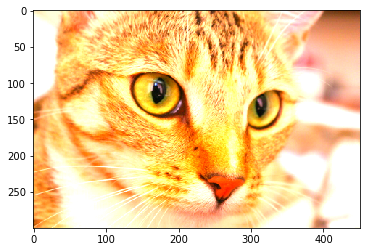

In [13]:
im_out = imageio.imread('test_image.png')/255.
plt.imshow(im_out)
plt.show()

# Next class: Pixel arithmetrics

- sum and difference in rgb
- pseudo-sum and pseudo-difference in yiq (gives other results than in rgb)
- if-lighter and if-darker

How to get 100%
- use the following images to test the code
- use only english variables and functions (!)
- reuse _rgb2yiq and _yiq2rgb from your "my_functions.py"
- don't implement big functions two times nearly identical

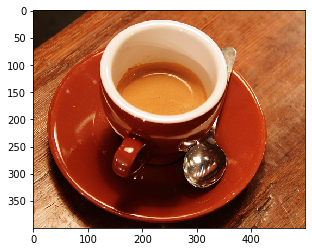

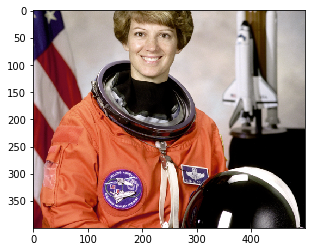

In [14]:
im_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255.
im_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255.
plt.imshow(im_1)
plt.show()

plt.imshow(im_2)
plt.show()

implement the following functions:

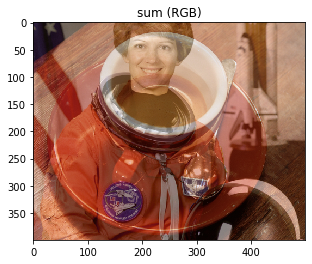

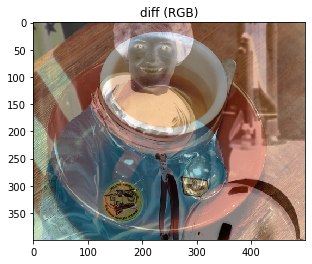

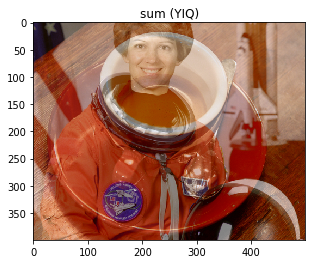

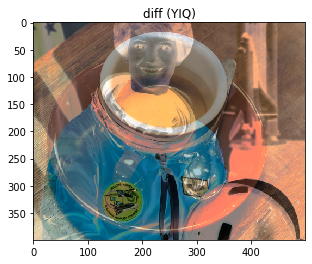

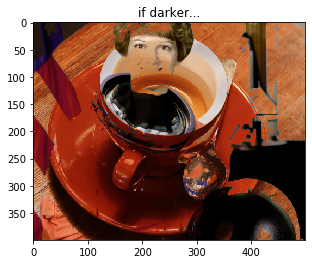

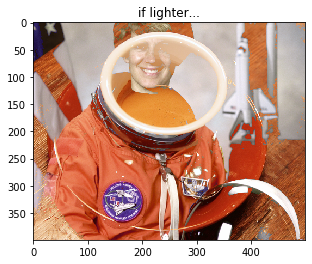

In [15]:
plt.imshow(mf.sum_rgb(im_1, im_2))
plt.title('sum (RGB)')
plt.show()

plt.imshow(mf.diff_rgb(im_1, im_2))
plt.title('diff (RGB)')
plt.show()

plt.imshow(mf.sum_yiq(im_1, im_2))
plt.title('sum (YIQ)')
plt.show()

plt.imshow(mf.diff_yiq(im_1, im_2))
plt.title('diff (YIQ)')
plt.show()

plt.imshow(mf.if_darker(im_1, im_2))
plt.title('if darker...')
plt.show()

plt.imshow(mf.if_lighter(im_1, im_2))
plt.title('if lighter...')
plt.show()

Is there any use of those functions besides art? 